# Visualization

## Import libraries and load dataset

In [5]:
%matplotlib inline  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import vtk
from vtk.util import numpy_support
import pyvista as pv

import jax
import sys
sys.path.append('../')  # Add the path to the ascending directory
sys.path.append('../src')  # Add the path to the ascending directory
from src.Scripts.mild_slope_second_approach_k import config
from src.Models import architectures, utils, pinns, process_data
import pickle

config['img_path_data'] = './Images/Data_visualization/'
config['img_path_results'] = './Images/Results/'
config['checkpoint_path'] = '../src/Checkpoints/Second_approach/Mild_slope_k/'
config['data_path'] = './Bath_and_topo/'

## Data

### Read data

In [6]:
maritime_data = pd.read_csv("./Bath_and_topo/maritime_data.csv", sep=",", index_col=False, header=2).to_numpy()
earth_data = pd.read_csv("./Bath_and_topo/earth_data.csv", sep=",", index_col=False, header=2).to_numpy()   
data = np.row_stack((earth_data, maritime_data))

### Plot datasets

##### Plot maritime data

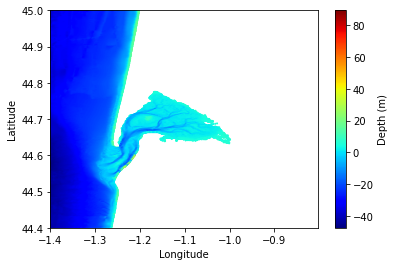

In [7]:
plt.figure()
plt.scatter(maritime_data[:,0], maritime_data[:,1], c=maritime_data[:,2], cmap="jet", s=1.0)
plt.clim(vmin=np.min(maritime_data[:,2]),vmax=np.max(earth_data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([data[:,0].min(), data[:,0].max()])
plt.ylim([data[:,1].min(), data[:,1].max()])
plt.savefig(config['img_path_data'] + "sea_data.png", facecolor='white', bbox_inches = 'tight')
plt.show()

##### Plot topography data

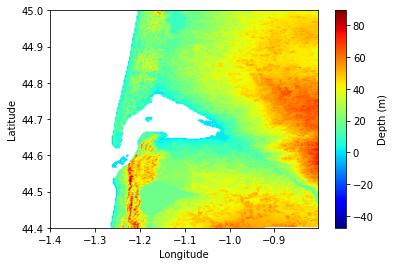

In [8]:
plt.figure()
plt.scatter(earth_data[:,0], earth_data[:,1], c=earth_data[:,2], cmap="jet", s=1.0)
plt.clim(vmin=np.min(maritime_data[:,2]),vmax=np.max(earth_data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([data[:,0].min(), data[:,0].max()])
plt.ylim([data[:,1].min(), data[:,1].max()])
plt.savefig(config['img_path_data'] + "topo_data.png", facecolor='white', bbox_inches = 'tight')
plt.show()


##### Plot topography and maritime data

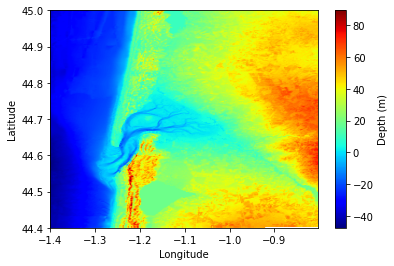

In [9]:
plt.figure()
plt.scatter(data[:,0], data[:,1], c=data[:,2], cmap="jet",s=1.0)
plt.clim(vmin=np.min(data[:,2]),vmax=np.max(data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([data[:,0].min(), data[:,0].max()])
plt.ylim([data[:,1].min(), data[:,1].max()])
plt.savefig(config['img_path_data'] + "topo_sea_data.png", facecolor='white', bbox_inches = 'tight')
plt.show()

## Smoothing

### Utilisation of k-nearest neighbors algorithm and its average depth to smooth the dataset

In [10]:
pre_processed_data = process_data.pre_process(maritime_data, earth_data, 7)
smooth_data = pre_processed_data.get_smooth_data(metters_scalling=False)
smooth_maritime_data = smooth_data[smooth_data[:,2]<0]
smooth_earth_data = smooth_data[smooth_data[:,2]>0]

Smoothing 10000 out of 158623
Smoothing 20000 out of 158623
Smoothing 30000 out of 158623
Smoothing 40000 out of 158623
Smoothing 50000 out of 158623
Smoothing 60000 out of 158623
Smoothing 70000 out of 158623
Smoothing 80000 out of 158623
Smoothing 90000 out of 158623
Smoothing 100000 out of 158623
Smoothing 110000 out of 158623
Smoothing 120000 out of 158623
Smoothing 130000 out of 158623
Smoothing 140000 out of 158623
Smoothing 150000 out of 158623
getting frontier 10000 out of 158623
getting frontier 20000 out of 158623
getting frontier 30000 out of 158623
getting frontier 40000 out of 158623
getting frontier 50000 out of 158623
getting frontier 60000 out of 158623
getting frontier 70000 out of 158623
getting frontier 80000 out of 158623
getting frontier 90000 out of 158623
getting frontier 100000 out of 158623
getting frontier 110000 out of 158623
getting frontier 120000 out of 158623
getting frontier 130000 out of 158623
getting frontier 140000 out of 158623
getting frontier 1500

### Plot smooth data

##### Maritime

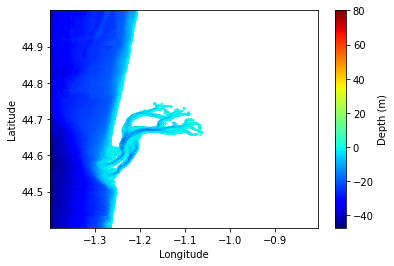

In [11]:
plt.figure()
plt.scatter(smooth_maritime_data[:,0], smooth_maritime_data[:,1], c=smooth_maritime_data[:,2], cmap="jet",s=1.0)
plt.clim(vmin=np.min(smooth_data[:,2]),vmax=np.max(smooth_data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([smooth_data[:,0].min(), smooth_data[:,0].max()])
plt.ylim([smooth_data[:,1].min(), smooth_data[:,1].max()])
plt.savefig(config['img_path_data'] + "sea_data_smooth.png", facecolor='white', bbox_inches = 'tight')
plt.show()

##### Topo

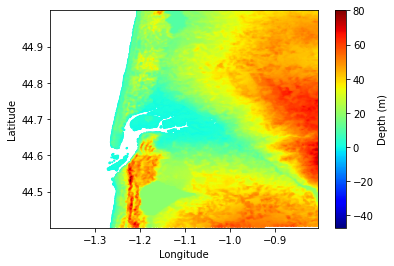

In [12]:
plt.figure()
plt.scatter(smooth_earth_data[:,0], smooth_earth_data[:,1], c=smooth_earth_data[:,2], cmap="jet", s=1.0)
plt.clim(vmin=np.min(smooth_data[:,2]),vmax=np.max(smooth_data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([smooth_data[:,0].min(), smooth_data[:,0].max()])
plt.ylim([smooth_data[:,1].min(), smooth_data[:,1].max()])
plt.savefig(config['img_path_data'] + "topo_data_smooth.png", facecolor='white', bbox_inches = 'tight')
plt.show()


##### Both

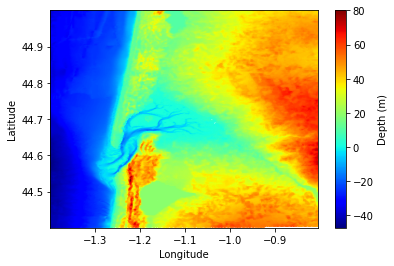

In [13]:
plt.figure()
plt.scatter(smooth_data[:,0], smooth_data[:,1], c=smooth_data[:,2], cmap="jet", s=1.0)
plt.clim(vmin=np.min(smooth_data[:,2]),vmax=np.max(smooth_data[:,2]))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
cbar = plt.colorbar()
cbar.set_label('Depth (m)', rotation=90)
plt.xlim([smooth_data[:,0].min(), smooth_data[:,0].max()])
plt.ylim([smooth_data[:,1].min(), smooth_data[:,1].max()])
plt.savefig(config['img_path_data'] + "topo_sea_data_smooth.png", facecolor='white', bbox_inches = 'tight')
plt.show()

## Results from mild-slope equation

### Pre-processing

In [14]:
XYZ_shoal = pre_processed_data.get_smooth_data(metters_scalling=True)
XYZ_shoal = jax.numpy.array(pre_processed_data.normalize(XYZ_shoal[XYZ_shoal[:,2]<0]))

scale = pre_processed_data.get_scale()
config['incident_height_normalized'] = config['incident_height']/scale

data_coast = pre_processed_data.get_smooth_frontier(metters_scalling=True)
data_coast = jax.numpy.array(pre_processed_data.normalize(data_coast))


xy_inside = XYZ_shoal[:,:2]
xy_bound_list, xy_bound_normals_list = utils.get_box_bounds2d(XYZ_shoal, data_coast, scale)
normals = jax.numpy.concatenate((xy_bound_normals_list[0], xy_bound_normals_list[1], xy_bound_normals_list[2],xy_bound_normals_list[3]))
bounds = jax.numpy.concatenate((xy_bound_list[0], xy_bound_list[1], xy_bound_list[2], xy_bound_list[3]))

##### Domain

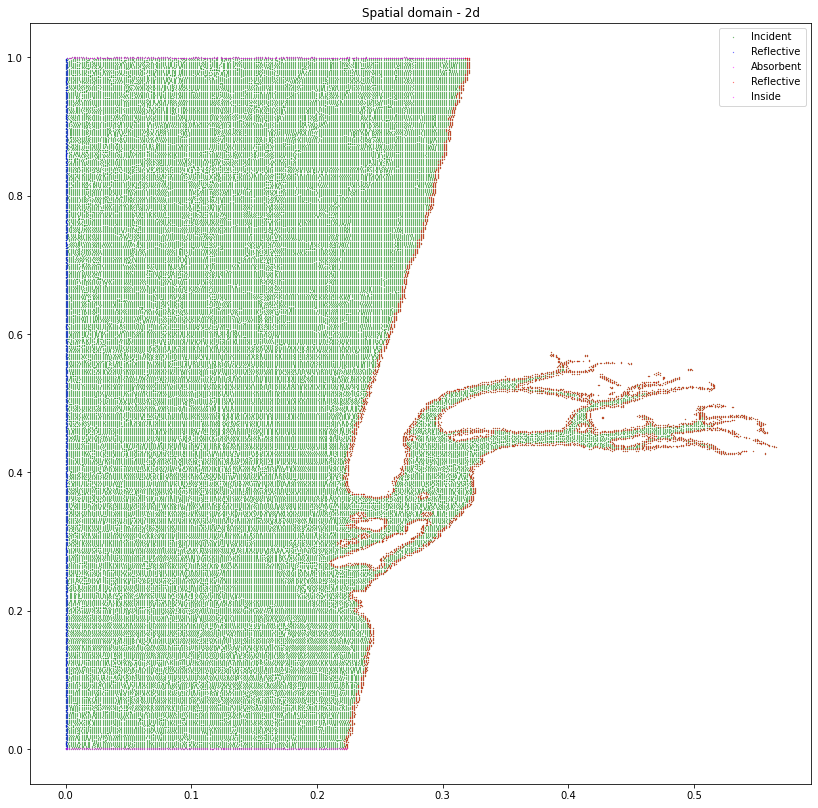

Number of points inside the domain: 101965
Number of points in the boundary: 6268


In [15]:
img_path = config['img_path_results'] + 'domain2d.png'
title = "Spatial domain - 2d"
utils.plot_2d_domain_with_boundary(xy_inside, xy_bound_list, img_path, title, ['blue', 'magenta', 'red', 'magenta'], ['Incident', 'Reflective', 'Absorbent', 'Reflective', 'Inside'])

print('Number of points inside the domain:', xy_inside.shape[0])
print('Number of points in the boundary:', bounds.shape[0])

##### Normals

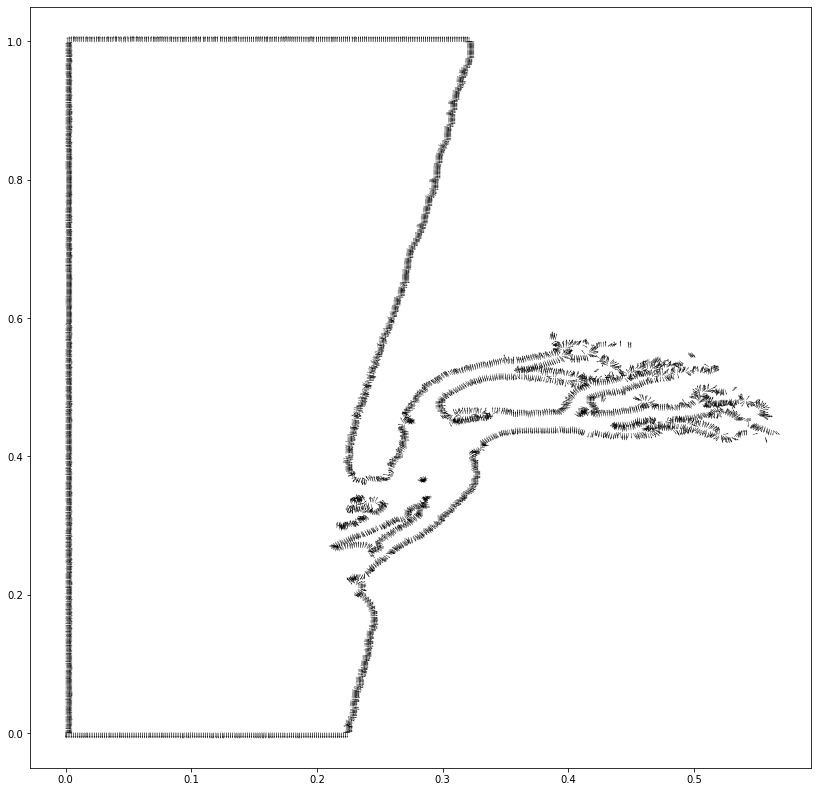

In [17]:
##### Get normals
xy_bound_list, xy_bound_normals_list = utils.get_box_bounds2d(XYZ_shoal, data_coast, scale)


##### Plotting normals
normals = jax.numpy.concatenate((xy_bound_normals_list[0], xy_bound_normals_list[1], xy_bound_normals_list[2], xy_bound_normals_list[3]))
bounds = jax.numpy.concatenate((xy_bound_list[0], xy_bound_list[1], xy_bound_list[2], xy_bound_list[3]))
utils.plot_normals_2d(bounds[:,:2], normals, config['img_path_results'] + 'normals.png')

### Load trained parameters

In [ ]:
NN_MLP = architectures.Complex_MLP(config['seed'], config['layers'])                 
NN_eval = NN_MLP.evaluation            # Evaluation function
solver = pinns.PINN_Mild_slope_second_approach(config, NN_eval, XYZ_shoal)

Omega values - mean: 0.00028763167069777965, min: 3.751158936653533e-13, max: 0.0004175093914375035


In [ ]:
params = pickle.load(open(config['checkpoint_path'] + "params", "rb"))
opt_state = pickle.load(open(config['checkpoint_path'] + "opt_state", "rb"))
loss_history = pickle.load(open(config['checkpoint_path'] + "loss_history", "rb"))
loss_residual = pickle.load(open(config['checkpoint_path'] + "loss_residual", "rb"))
loss_boundary = pickle.load(open(config['checkpoint_path'] + "loss_boundary", "rb"))

### Loss function plot

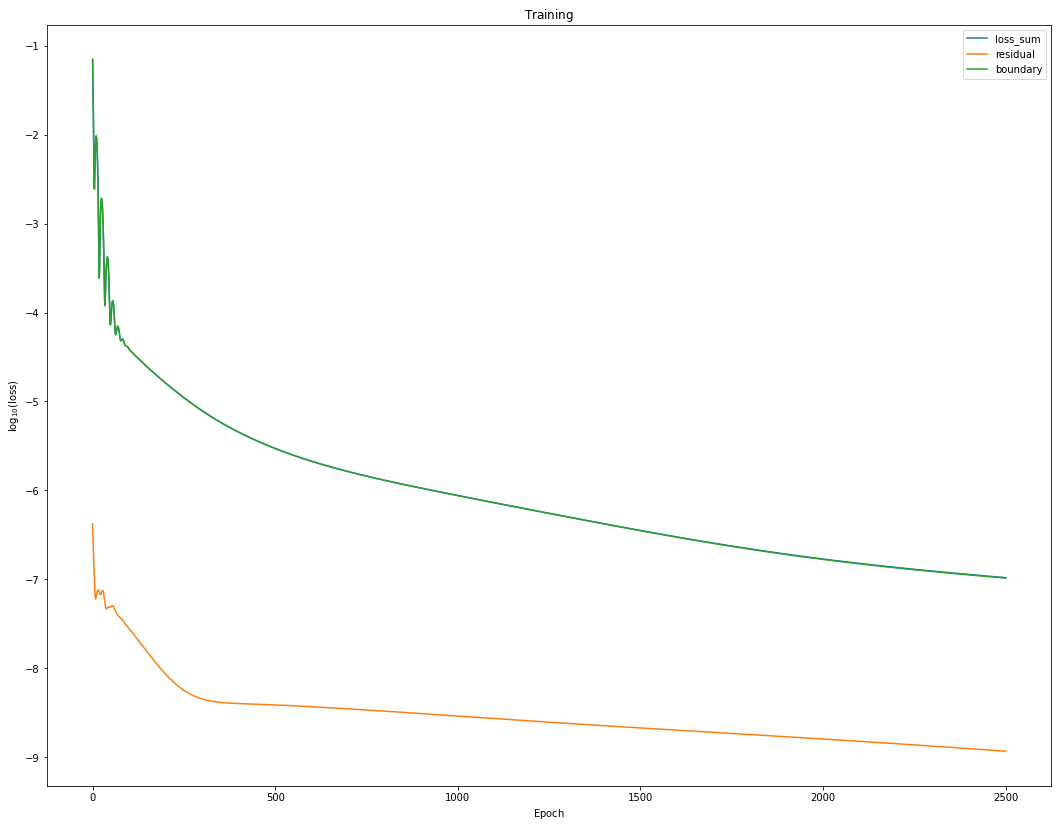

In [ ]:
img_path = config['img_path_results'] + 'loss_function.png'
losses = [loss_history, loss_residual, loss_boundary]
__ = utils.plot_loss_history(losses, img_path, ['loss_sum', 'residual', 'boundary'])

### Elevation

In [ ]:
sea_data = pre_processed_data.get_smooth_data(metters_scalling=False)
sea_data = sea_data[sea_data[:,2]<0]
post_processing = process_data.post_process(solver.elevation, sea_data)
elevation = post_processing.convert_to_output

##### Plot 2d

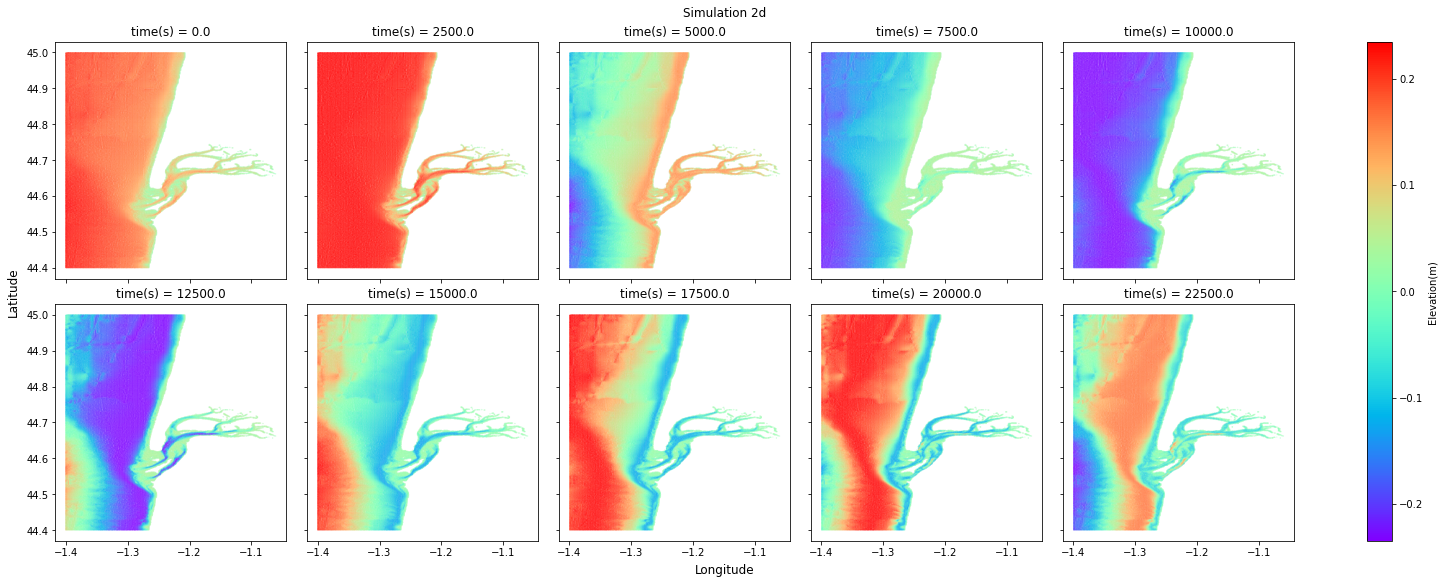

In [ ]:
times = np.linspace(0, 25000, 10, endpoint=False).reshape(2,5)
img_path = config['img_path_results'] + 'frames_2d.png'
title = "Simulation 2d"
utils.plot_frames2d(sea_data[:,:2], params, elevation, times, img_path, title)

### Animation

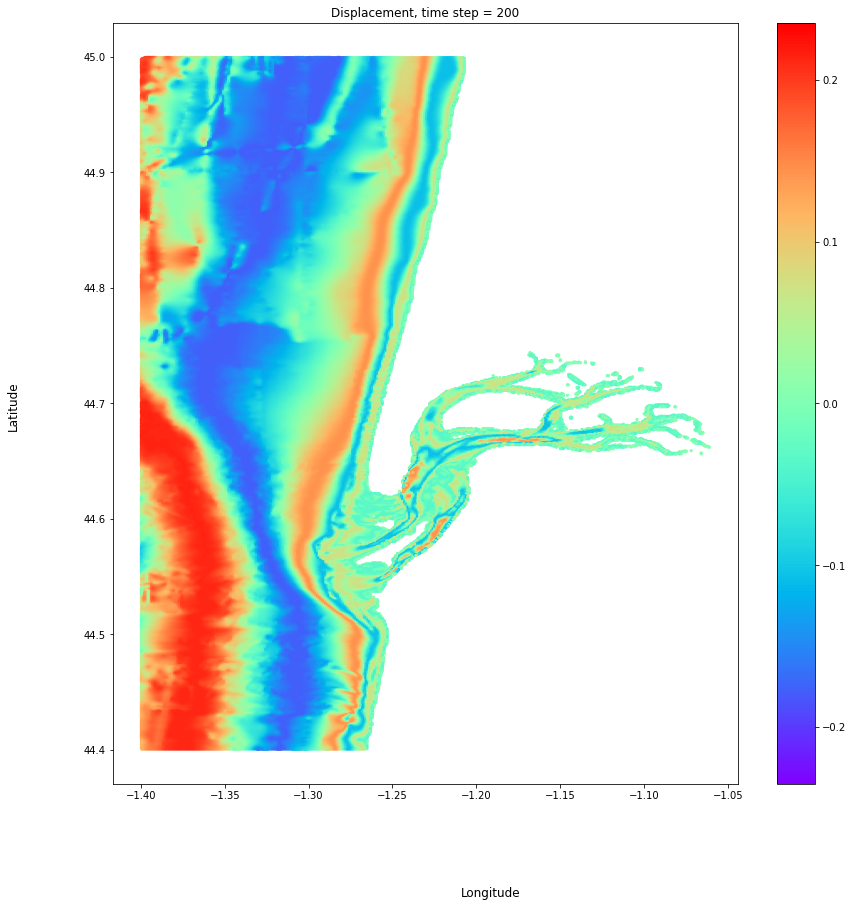

In [ ]:
frames = 200
end_time = 50000.0
path = config['img_path_results'] + 'mild_slope_animation2d.gif'
utils.plot_2d_animation(sea_data[:,:2], params, elevation, end_time, frames, path)

##### Plot 3d

## Generate a mesh for the original data

### Grid

In [ ]:
smooth_data = pre_processed_data.get_smooth_data(metters_scalling=True)
cloud = pv.PolyData(smooth_data)
grid = cloud.delaunay_2d(alpha=3000)   # We use the Delaunay method to make the mesh
print("Number of points",grid.number_of_points)
print("Number of cells",grid.number_of_cells)

Number of points 158625
Number of cells 315892


### Coloring

In [ ]:
### Coloring cells
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
depth_scale=[]
for i in range(grid.number_of_cells):
    cell=grid.cell_points(i)
    sum=0
    for j in range(len(cell)):
        sum+=cell[j][2]
    sum=int(sum/len(cell))
    depth_scale.append(sum)

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Depth (m)")
grid.GetCellData().SetScalars(colors)
#for t in depth_scale:
    #colors.InsertNextValue(t)
#grid.GetCellData().SetScalars(colors)


### Coloring points
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
depth_scale=[]
for i in range(grid.number_of_points):
    depth_scale.append(int(smooth_data[i][2]))

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Depth (m)")
grid.GetPointData().SetScalars(colors)
#for t in depth_scale:
#    colors.InsertNextValue(t)
#grid.GetPointData().SetScalars(colors)

0

### Plot and save

In [ ]:
grid.plot(show_edges=True)
grid.save('./mesh_arcachon_original.vtk')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

## Mesh arcachon solution

### Grid

In [ ]:
sea_data = pre_processed_data.get_smooth_data(metters_scalling=False)
sea_data = sea_data[sea_data[:,2]<0]
wave_height = elevation(params, sea_data[:,0], sea_data[:,1], np.zeros_like(sea_data[:,2])).flatten()

sea_data = pre_processed_data.get_smooth_data(metters_scalling=True)
wave_data = np.column_stack((sea_data[sea_data[:,2]<0][:,0], sea_data[sea_data[:,2]<0][:,1], wave_height))
wave_plus_earth = np.row_stack((wave_data, sea_data[sea_data[:,2]>0]))

In [ ]:
wave_data = np.array(wave_data)

### Mesh bassin (wave)

In [ ]:
### Coloring cells
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
cloud = pv.PolyData(wave_data)
grid = cloud.delaunay_2d(alpha=250)   # We use the Delaunay method to make the mesh

print("Number of points",grid.number_of_points)
print("Number of cells",grid.number_of_cells)


Number of points 101949
Number of cells 201554


In [ ]:
depth_scale=[]
wave_scale = 1000
for i in range(grid.number_of_cells):
    cell=grid.cell_points(i)
    sum=0
    for j in range(len(cell)):
        sum+=cell[j][2]
    sum=int(wave_scale*sum/len(cell))
    depth_scale.append(sum)

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Height (mm)")
grid.GetCellData().SetScalars(colors)
#for t in depth_scale:
    #colors.InsertNextValue(t)
#grid.GetCellData().SetScalars(colors)


### Coloring points
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
depth_scale=[]
for i in range(grid.number_of_points):
    depth_scale.append(int(wave_scale*wave_data[i][2]))

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Height (mm)")
grid.GetPointData().SetScalars(colors)
#for t in depth_scale:
#    colors.InsertNextValue(t)
#grid.GetPointData().SetScalars(colors)

0

In [ ]:
grid.plot(show_edges=True)
grid.save('./mesh_arcachon_sea_solution.vtk')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)

### Mesh arcachon (wave+earth)

In [ ]:
### Coloring cells
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
cloud = pv.PolyData(wave_plus_earth)
grid = cloud.delaunay_2d(alpha=3000)   # We use the Delaunay method to make the mesh

print("Number of points",grid.number_of_points)
print("Number of cells",grid.number_of_cells)


Number of points 158624
Number of cells 315890


In [ ]:
depth_scale=[]
for i in range(grid.number_of_cells):
    cell=grid.cell_points(i)
    sum=0
    for j in range(len(cell)):
        sum+=cell[j][2]
    sum=int(sum/len(cell))
    depth_scale.append(sum)

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Depth (m)")
grid.GetCellData().SetScalars(colors)
#for t in depth_scale:
    #colors.InsertNextValue(t)
#grid.GetCellData().SetScalars(colors)


### Coloring points
#colors = vtk.vtkIntArray()
#colors.SetName("Depth (m)")
depth_scale=[]
for i in range(grid.number_of_points):
    depth_scale.append(int(wave_plus_earth[i][2]))

colors = numpy_support.numpy_to_vtk(depth_scale, deep=True, array_type=vtk.VTK_INT)
colors.SetName("Depth (m)")
grid.GetPointData().SetScalars(colors)
#for t in depth_scale:
#    colors.InsertNextValue(t)
#grid.GetPointData().SetScalars(colors)

0

In [ ]:
grid.plot(show_edges=True)
grid.save('./mesh_arcachon_solution.vtk')

ViewInteractiveWidget(height=768, layout=Layout(height='auto', width='100%'), width=1024)